# Optimal Portfolio
This notebook construct 3 different optimal portfolios. The maximum sharpe-ratio portfolio (*simple risk adjusted return*), the maximum calmar-ratio portfolio (*maximum drawdown adjusted return*) and the minimum variance portfolio.

\begin{align}
    \text{Sharpe Ratio}&=\frac{R_{p}-R_{f}}{\sigma_{p}}\\
    \text{Calmar Ratio}&=\frac{R_{p}-R_{f}}{\text{Maximum Drawdown}}
\end{align}
where $R_{p}$ denotes the portfolio's annualized return, $R_{f}$ denotes the risk-free interest rate, $\sigma_{p}$ denotes the standard deviation ($\approx$*risk*) of the portfolio and maximum drawdown is measured as the pct.-change from trough to peak, i.e. peak-value minus trough-value divided by peak-value.




In [1]:
############## Loading relevant packages ##############
import numpy as np
import pandas as pd
import datetime as dt
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# local module
import pftools
import VaR_and_ES as vares
# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

## Loading and cleaning data
In this notebook, data can be fetched using the downloaded CSV-files or using the yahoo database.

In [33]:
# pick which tickers to use in the analysis.
# Make sure names are compatible with yahoo database or file-name
tickers = ['SXR8', 'XACTC25', 'XDJP', 'LCUA' ,'SXRP', 'SXRL', 'XJSE']

# getting data from a local csv-file
df, rdf, cdf = pftools.df_generator(tickers,'csv','C:/Users/olufk/OneDrive/Documents/GitHub/PortfolioDesign/PortfolioDesign/OptimalPF/Data_Investing_com/')

Will eventually output description of each ticker in df


In [6]:
# pick which tickers to use in the analysis.
# Make sure names are compatible with yahoo database or file-name
tickers = ['fortum.he', 'danske.co', 'saf.pa', 'wm']

# enter time period of interest
start = dt.datetime(2014, 6, 30)
end = dt.datetime(2019, 6, 30)

# getting data from yahoo database
# df, rdf, cdf = pftools.df_generator(tickers,'yahoo')

## Describing each tickers
Now that data is loaded, it's time to get an idea of the characteristics of the tickers

C:\Users\olufk\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\olufk\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\olufk\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\olufk\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


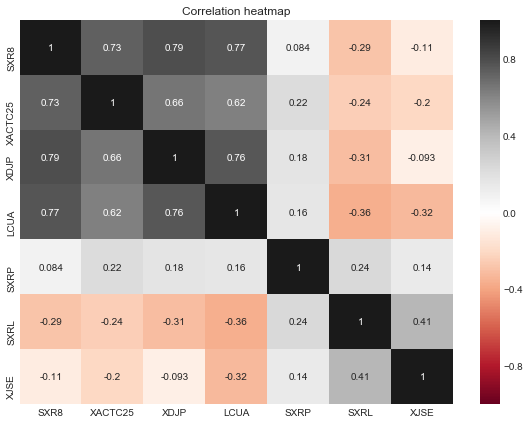

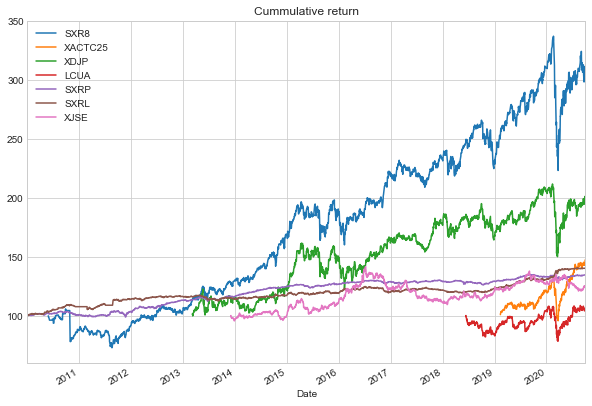

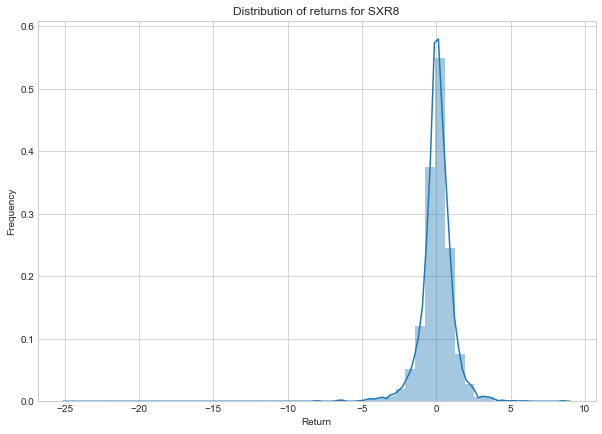

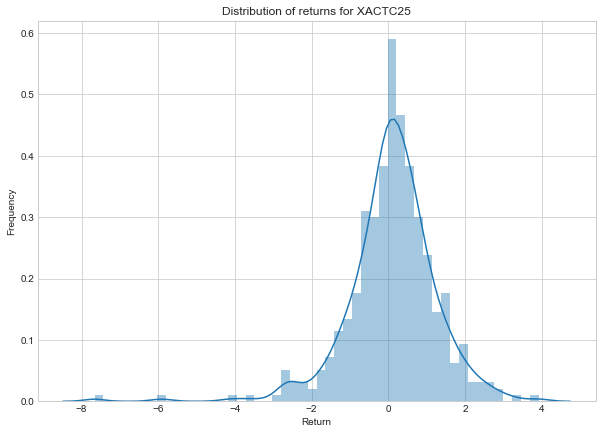

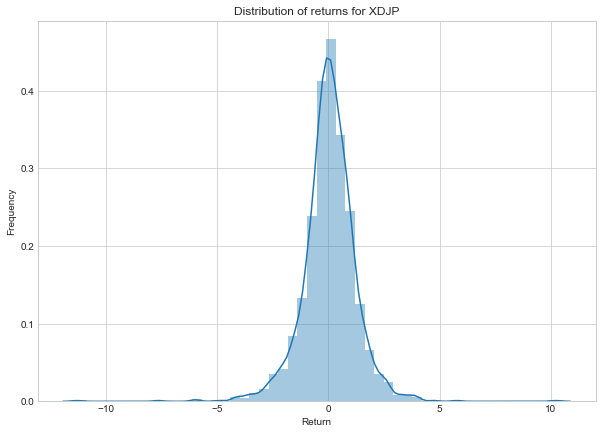

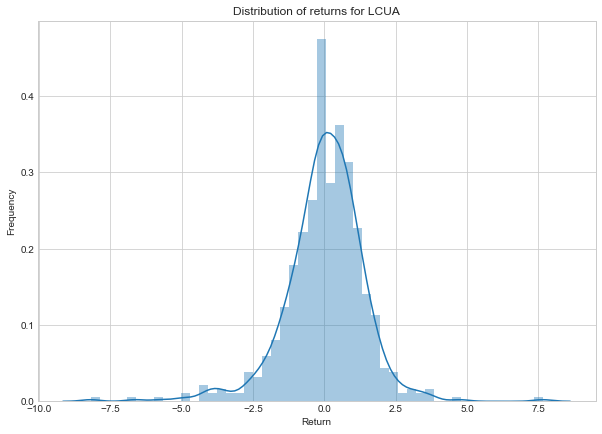

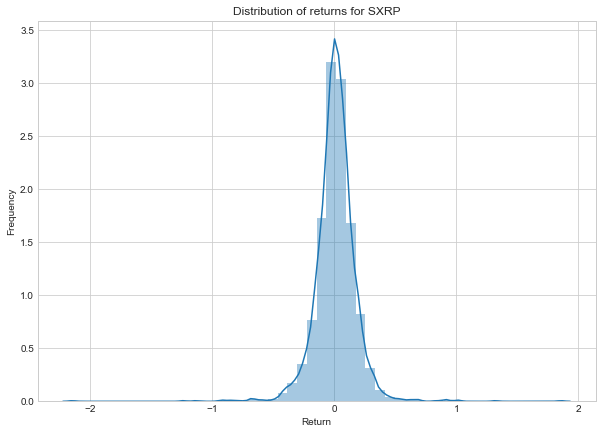

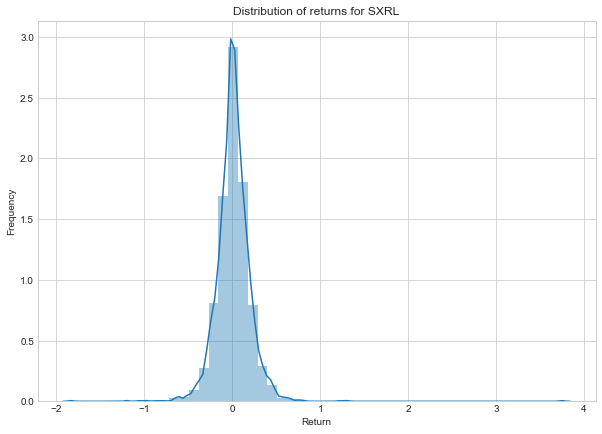

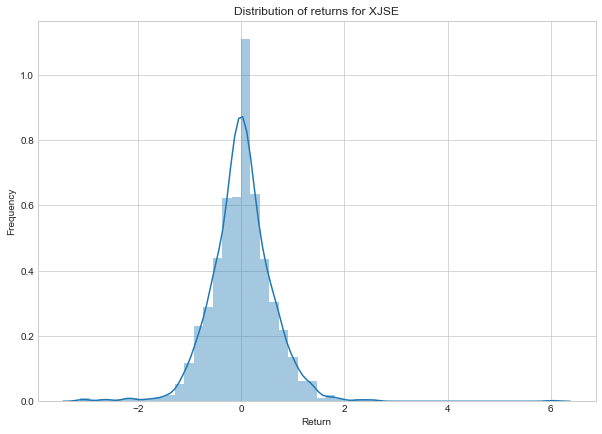

,Ticker,annualized_return,volatility,sharpe_ratio,calmar_ratio
0,SXR8,7.88,18.17,0.43,0.32
1,XACTC25,17.67,18.46,0.96,2.31
2,XDJP,6.50,19.11,0.34,0.57
3,LCUA,2.03,22.31,0.09,0.25
4,SXRP,1.93,2.71,0.71,0.90
5,SXRL,2.20,3.15,0.70,1.20
6,XJSE,2.19,9.59,0.23,0.70


In [3]:
pftools.desc_ticks(df,rdf,cdf)

In [37]:
omega_hat, alpha_hat, ll = vares.ARCH1_est('SXR8',df)

Estimating SXR8 as a ARCH(1)-model resulted in:
Omega^hat                       --> 1.2175 with std. errors (0.0263) and t-val 46.3478
alpha^hat                       --> 0.1339 with std. errors (0.0161) and t-val 8.3098
Maximized log-likelihood        --> -3377.606
--------------------------------------------------------------------------------------


Risk measures for SXR8 at 3 period losses with a 0.05 risk level is
-----------------------------------------
Gauss
-----
VaR                             --> 3.36
ES                              --> 4.21
-----------------------------------------
ARCH(1)
------
VaR (average)                   --> 3.33
ES  (average)                   --> 4.21
-----------------------------------------


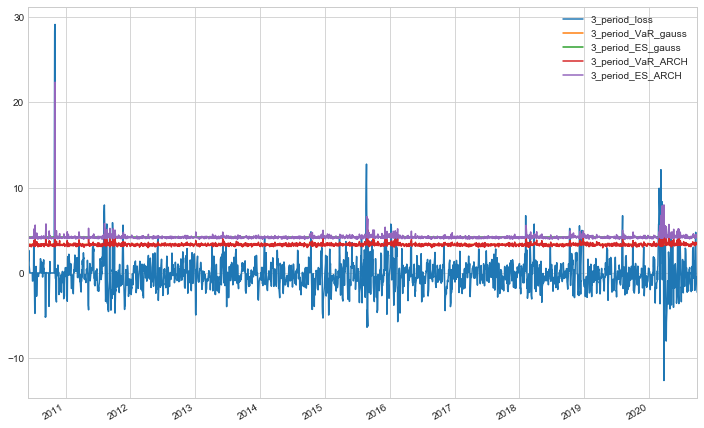

Signature: vares.VaRES(omega, a, df, ticker, alpha, h, M, printres=True)
Docstring:
Calculates gaussian and ARCH(1) Value at Risk and Expected shortfall for a given ticker at a given risk level (alpha).

Args:
omega (float): the estimated omega of the ticker (using an ARCH(1)-model) 
a (float): the estimated alpha of the ticker (using an ARCH(1)-model)
df (dataframe): dataframe containing the adjusted close price of ticker
ticker (string): string being the relevant ticker code (name of column in dataframe)
alpha (float): is the risk level being in (0,1)
h (integer): is the h period loss
M (integer): denotes the number of simulations for each time period
printres (boolean): whether or not to print the results, by default True

Returns:
(dataframe): dataframe containing the 2 period loss, 2 period VaR and ES for both gaussian and ARCH(1) returns 
File:      c:\users\olufk\onedrive\documents\github\portfoliodesign\portfoliodesign\optimalpf\var_and_es.py
Type:      function


In [42]:
vares_df = vares.VaRES(omega_hat,alpha_hat,df,'SXR8',0.05,3,2000)
vares_df.plot(figsize = (12,8))
?vares.VaRES